# eReefs plotting functions

We will reuse what we did in the previous notebooks but this time by putting the `eReefs_map` and `eReefs_cross` functions in a Python file and calling it from the notebook.

:::{seealso}
Some examples of plotted maps from eReefs dataset can be found on the
[AIMS website](https://ereefs.aims.gov.au/ereefs-aims#ereefs-bgc-model).
:::

You will see a file in the `Jupyterlab` environment under the examples folder called `functions.py` which contains our function. 

In [1]:
import os
import shutil
from PIL import Image  # To create gifs

from Mapfct import *     # Here is where we call the function.
from Crossfct import *   # Here is where we call the function.

# %config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode

## Map plotting

Let's first have a look to see if we have access to our function... we use the `help()` function which provides the informations about our function.

In [2]:
#help(eReefs_map)

Similar to what we have done before, we first open the desired netcdf file from the OPenDAP server:

In [3]:
month = 3
year = 2020
netCDF_datestr = str(year)+'-'+format(month, '02')
print('File chosen time interval:',netCDF_datestr)
# GBR4
inputFile = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"+netCDF_datestr+".nc"
nc_data = Dataset(inputFile, 'r')

File chosen time interval: 2020-03


We then defined the variables that needs to be set for the `eReefs_map` function:

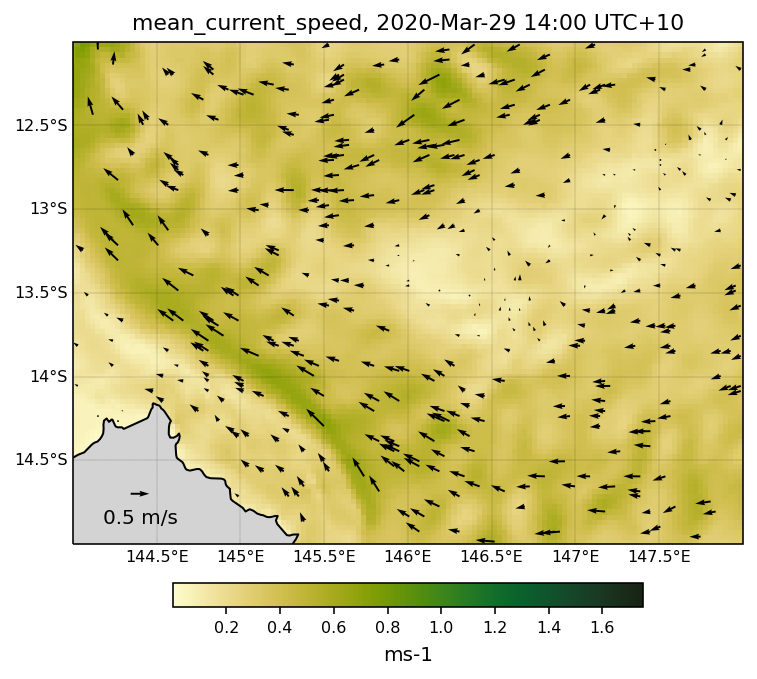

<Figure size 432x288 with 0 Axes>

In [4]:
selectedVariable = 'mean_cur' 
selectedTimeIndex = 29        
selectedDepthIndex = -1       

# Vector field mapping information
veclenght = 0.5
vecsample = 30
vecscale = 18

# Figure size
size = (6, 8)

# Used color
color = cmocean.cm.speed

# Variable range for the colorscale
curlvl = [0.001,1.75]

# Saved file name
fname = 'GBRcurrent'

# Region to plot
zoom = [144,-15,148,-12]

# We now call the function
eReefs_map(nc_data, selectedTimeIndex, selectedDepthIndex, 
           selectedVariable, curlvl, color, size, fname, 
           vecsample, veclenght, vecscale, zoom, 
           show=True, vecPlot=True, save=False)

Now we will loop over time for our monthly record and save the successive daily images in a folder.

In [5]:
# Name of the folder where images will be saved
dir = 'fig-currents'      

# We check if the folder exists, in this case if it does we remove it and 
# create a new one
if os.path.exists(dir):
    shutil.rmtree(dir)
os.makedirs(dir)

# We will then put each daily figure in this new folder
fname = dir+'/curr'

We will use a `for` loop and for each iteration we will call the `eReefs_map` function with a new time step. To speed up the process we will not plot each individual image in our notebook (set `show=False`) and will save the figures by setting `save=True`:

In [6]:
imgs = []
# For running over the entire time period remove the next line 
# and uncomment the following one 
for k in range(0,1): 
# for k in range(nc_data['time'].shape[0]):
    
    selectedTimeIndex = k
    
    # We now call the function. To save time we will not plot the data 
    # but save the file
    eReefs_map(nc_data, selectedTimeIndex, selectedDepthIndex, 
               selectedVariable, curlvl, color, size, fname, 
               vecsample, veclenght, vecscale, zoom, 
               show=False, vecPlot=True, save=True)
    
    imgs.append(f"{fname}_time{selectedTimeIndex:04}_zc{selectedDepthIndex:04}.png")

<Figure size 432x288 with 0 Axes>

We can use the [pillow](https://pillow.readthedocs.io/en/stable/) imaging library to create an animated gif from our png figures.

In [7]:
# Create the frames
frames = []
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save(dir+'/mycurrents.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=500, loop=0)

We have just made a cleaner version of the previous notebook where the core function is defined in a Python function that we called and imported like other libraries. 

:::{note}
The function is flexible enough that it can be used to visualise either the entire GBR or part of it as well as the different variables available in the netCDF files.
:::


:::{figure-md} fig-target_ex1
:class: myclass

<img src="./currents.gif" alt="currents" width="600px">

Animated gif showing the mean current evolution for a specific region .
:::



## Cross-section plotting

In [ ]:
#help(eReefs_cross)

We start by calling the desired eReefs dataset:

In [ ]:
month = 4
year = 2019
netCDF_datestr = str(year)+'-'+format(month, '02')
print('File chosen time interval:',netCDF_datestr)
# GBR4
inputFile = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_daily-monthly-"+netCDF_datestr+".nc"
nc_bio = Dataset(inputFile, 'r')

We then defined the variables that needs to be set for the `eReefs_cross` function:

In [ ]:
selectedTimeIndex = 0  
selectedVariable = 'alk' 
color = cmocean.cm.matter

latVal = -11. 
xLon = [142.5,150.25]
dext = [2190.,2270.]

fLat = 'lat11'
sizeLat = (9,3)

eReefs_cross(nc_bio, selectedTimeIndex, selectedVariable, color, 
             latVal, None, sizeLat, fLat, xLon, dext, show=True, 
             save=False)

Now we will loop over time for our monthly record and save the successive daily images in a folder.

In [ ]:
# Name of the folder where images will be saved
dir = 'fig-alk'      

# We check if the folder exists, in this case if it does we remove it and 
# create a new one
if os.path.exists(dir):
    shutil.rmtree(dir)
os.makedirs(dir)

# We will then put each daily figure in this new folder
fname = dir+'/lat11'

Here, we will use again a `for` loop and for each iteration we will call the `eReefs_cross` function with a new time step. To speed up the process we will not plot each individual image in our notebook (set `show=False`) and will save the figures by setting `save=True`:

In [ ]:
imgs = []
# For running over the entire time period remove the next line 
# and uncomment the following one 
for k in range(0,1): 
#for k in range(nc_bio['time'].shape[0]):
    
    selectedTimeIndex = k
    
    # We now call the function. To save time we will not plot the data 
    # but save the file
    eReefs_cross(nc_bio, selectedTimeIndex, selectedVariable, color, 
             latVal, None, sizeLat, fname, xLon, dext, show=False, 
             save=True)
    
    imgs.append(f"{fname}_cross_time{selectedTimeIndex:04}.png")

Using the [pillow](https://pillow.readthedocs.io/en/stable/) imaging library we create an animated gif from our png figures.

In [ ]:
# Create the frames
frames = []
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save(dir+'/myalk.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=500, loop=0)

Here is the result:


:::{figure-md} fig-target_ex2
:class: myclass

<img src="./myalk.gif" alt="currents" width="600px">

Animated gif showing the total alkalinity evolution for a cross-section at 11S.
:::